# Aprendizaje NO Supervisado

[Video](https://www.youtube.com/watch?v=FTtzd31IAOw&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=28)

En este notebook veremos las bases de la segunda rama más importante del ML y además veremos tres técnicas más populares e importantes para este método de aprendizaje:
- Clustering
- Detección de anomalías
- Reducción de dimensiones

## ¿Qué es el aprendizaje no supervisado?
Nosotros le aportamos a la máquina los datos donde solo habrá características(X) y la máquina será quien clasifique estos datos y les de sentido. Así la máquina creará grupos a los que les pondrá una etiqueta(y) a cada uno en base a las similitudes entre las características encontradas. Un ejemplo de esto sería, segmentación de clientes en función de su comportamiento de compra, clasificar tweets por su contenido o fotos en base a un tema. Esta tarea la realizaremos mediante el algoritmo K-Means Clustering

Otra tarea que puede realizar la máquina gracias al aprendizaje no supervisado es detectar anomalías. La máquina analiza la estructura de los datos y puede diferenciar aquellos datos que se salen de unos parámetros estandar. Esto tiene aplicaciones en sistemas de seguridad en coches autónomos, detección de hacking o detección de defectos de fabricación de piezas(Ensayos No Destructivos). Para estos casos será necesario usar el algoritmo Isolation Forest

Para terminar, como tercera aplicación encontramos la reducción de dimensiones. En este escenario la máquina aprende a simplificar la estructura de datos conservando las características principales más importantes. Esto tiene sentido en los casos donde tenemos altos volúmenes de características y no podemos adivinar cuales entre todas nos conviene conservar. En situaciones así hacemos uso del algoritmo PCA

## 1. Clasificación con K-Means Clustering

El funcionamiento de este algoritmo se basa en colocar una serie de puntos llamados centroides y realizar iterativamente dos pasos:
1. medir la distancia entre el centroide y los puntos más cercanos a él.
2. desplazar el centroide al la mitad de esos puntos cercanos.

Este proceso se realiza muchas veces hasta que se estabiliza y además se lleva a cabo para mútiples escenarios, es decir, con los centroides colocados en lugares distintos del espacio. Al fin y al cabo lo que hace el algoritmo es buscar el escenario donde las distancias entre puntos y centroides sea la menor. Ese valor que analiza el algoritmo se llama **'inercia'**

Por defecto el algoritmo coloca los centroides en los extremos del dataset a menos que nosotros especifiquemos dónde queremos colocarlos.

[Leer más sobre KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Leer más sobre .make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

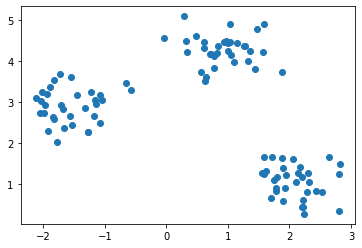

In [1]:
# import princiaples
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generamos unos cuantos datos con la función make_blobs
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [2]:
# importamos el objeto
from sklearn.cluster import KMeans

# creamos el objeto modelo
model = KMeans(n_clusters=3)
# entrenamos el modelo
model.fit(X)

KMeans(n_clusters=3)

Una vez entrenado creado el modelo y entrenado podemos observar el resultado de la clasificación. Usando tanto el método `labels_` como la función `.predict()` podemos obtener el mismo resultado, una colección de etiquetas 0, 1 y 2.

In [3]:
print('usando el método labels_:', model.labels_, '\n')
print('usando la función .predict():', model.predict(X))

usando el método labels_: [1 2 1 2 2 2 0 0 1 2 2 2 1 2 0 1 0 2 0 0 0 0 0 2 1 1 1 1 0 0 2 1 1 2 0 0 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 0 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 2 2 1
 1 2 2 2 0 1 2 2 1 2 1 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0] 

usando la función .predict(): [1 2 1 2 2 2 0 0 1 2 2 2 1 2 0 1 0 2 0 0 0 0 0 2 1 1 1 1 0 0 2 1 1 2 0 0 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 0 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 2 2 1
 1 2 2 2 0 1 2 2 1 2 1 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0]


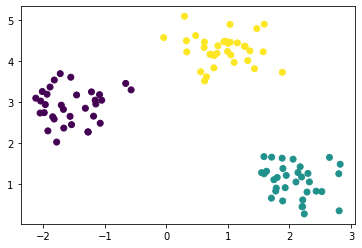

In [4]:
# representamos gráficamente el restultado
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.show()

algo interesante que podemos representar también son los centroides de cada cluster. Esto lo hacemos usando el método `cluster_centers_`

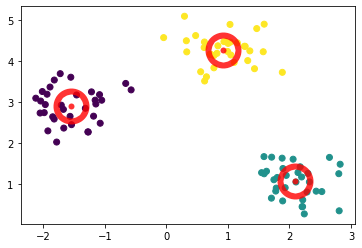

In [5]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r', lw=30, alpha=0.8)
plt.show()

Por último, señalar que para enteder el rendimiento que tiene el modelo podemos hacer uso de la función `.score()` o bien el atributo `.inertia_`, los cuales nos dan un valor numérico de cuan preciso es el modelo. 

In [6]:
print('resultado con la función score: ', model.score(X))
print('resultado con el método intertia_:', model.inertia_)

resultado con la función score:  -30.870531280140664
resultado con el método intertia_: 30.87053128014066


Como hemos visto, hemos podido identificar correctamente los datos, pero imaginemos una nube de puntos más compleja, con burbujas peor definidas y un número de dimensiones muy alto. El algoritmo lo tendría dificil para identificar bien los grupos. Para ello usamos una técnica llamada "Elbow Method" o método del codo. 


### 1.1 Elbow Method
El método del codo consiste en analizar el rendimiento(inercia) del algoritmo en función del número de clusters. Allí donde se aprecia un cambio de tendencia tenemos un número óptimo. 

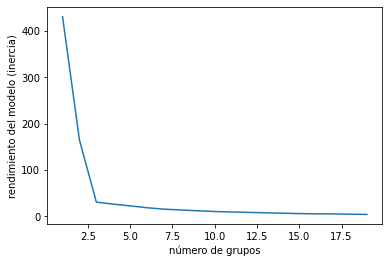

In [7]:
# creamos una lista vacía para guardar las inercias calculadas
inertia = []

# valores que tomará el bucle 
K_range = range(1,20)

# bucle para calcular las inercias 
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
    
# representamos
plt.plot(K_range, inertia)
plt.xlabel('número de grupos')
plt.ylabel('rendimiento del modelo (inercia)')
plt.show()

In [8]:
inertia

[430.9164124491007,
 164.99757155273892,
 30.87053128014066,
 26.599027011144916,
 22.815746973593704,
 18.764388971764948,
 15.780682893610246,
 13.897690305963192,
 12.269365887179392,
 10.65240081628526,
 9.62352943692277,
 8.72419107116784,
 7.834050947817018,
 7.047729928755867,
 6.155796381976281,
 5.654139532482546,
 5.490660227300088,
 4.781167981759753,
 4.384468027006314]

### 1.2 Otros algoritmos de clustering

Existen otros muchos métodos para clasificar los datos por grupos pero a modo de consejo se recomiendan 3 por su utilidad y flexibilidad:
1. `cluster.AgglomerativeClustering()` - agrupación jerárquica
2. `cluster.DBSCAN()` - por sus siglas Density-based spatial clustering of applications with noise 
3. `cluster.SpectralClustering()`

[Leer más sobre algoritmos de clustering](https://scikit-learn.org/stable/modules/clustering.html)

[Leer más sobre la API sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)

## 2. Detección de anomalías con Isolation Forest

La detección de anomalias es la segunda técnica que veremos en este notebook y se basa en descubrir aquellos datos atípicos o aberrantes dentro de una muestra. En resumen, la tecnica se basa en hacer cortes en el dataset y aislar los valores aberrantes.

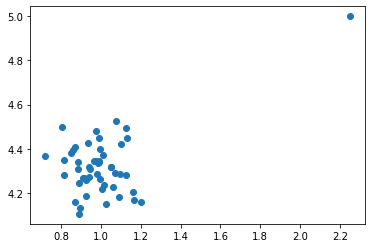

In [9]:
# creamos los datos necesarios
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])
plt.show()

In [10]:
# importamos el objeto
from sklearn.ensemble import IsolationForest

# creamos el modelo
model = IsolationForest(contamination=0.01) # contaminación del 1%
# lo entrenamos
model.fit(X)

IsolationForest(contamination=0.01)

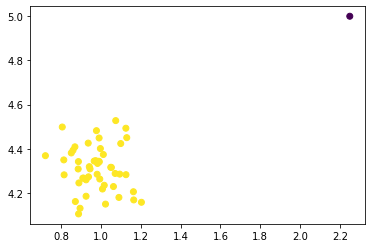

In [11]:
# representamos los datos
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))
plt.show()

Como vemos en este ejemplo, hemos conseguido identificar el valor anómalo y de hecho ésta herramienta nos viende de perlas para descubir datos outliers, es decir, valores atípicos. Si la máquina los descubre por nosotros, pues es un trabajo menos a tener en cuenta cuando preprocesamos los datos.
### 2.1 Identificar datos atípicos
Veamos otro ejemplo usando los datos de un conjunto de datos extraidos de unos números escritos a mano. Le proporcionaremos los datos a la máquina y ella nos dirá cuales son menos útiles.

In [12]:
# importamos el dataset
from sklearn.datasets import load_digits

# asignamos características y etiquetas
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

# veamos el tamaño
print(X.shape)

(1797, 64)


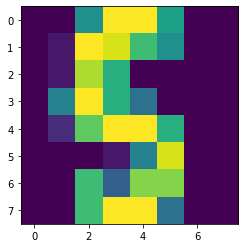

In [13]:
# podemos visualizar cualquier imagen al azar del dataset
plt.imshow(images[np.random.randint(0,X.shape[0])])
plt.show()

In [14]:
# definimos el modelo
model = IsolationForest(random_state=0, contamination=0.02) # contaminación del 2%
# lo entrenamos
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [15]:
# predecimos
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

Lo que tenemos gracias a la función `predict()` es un array con valores que pueden tomar dos estados: 1, es decir un valor normal o -1, es decir, una anomalía. Como la contaminación aceptable es del 2% quiere decir que solo habrá ese porcentaje de valores anómalos.
Realicemos un indexado lógico (boolean indexing) para revelar esos números

In [16]:
outliers = model.predict(X) == -1

outliers

array([False, False, False, ..., False, False, False])

In [17]:
# cuántos valores son True
images[outliers].shape

(36, 8, 8)

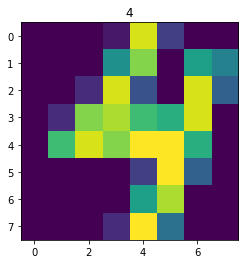

In [22]:
# creamos un indice aleatorio
tam = images[outliers].shape[0]
i = np.random.randint(0,tam)

# podemos visualizar cualquier imagen anómala
plt.imshow(images[outliers][i])
plt.title(y[outliers][i])
plt.show()

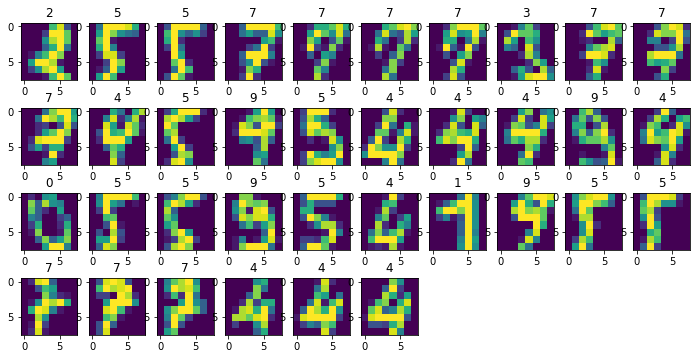

In [23]:
plt.figure(figsize=(12, 6))
for i in range(images[outliers].shape[0]):
    plt.subplot(4, 10, i+1)
    plt.imshow(images[outliers][i])
    plt.title(y[outliers][i])

In [27]:
# # incluso conocer qué números fallan más que otros
# f = {}
# for i in range(len(y[outliers])):
#     if y[outliers][i] in f:
#         f

array([2, 5, 5, 7, 7, 7, 7, 3, 7, 7, 7, 4, 5, 9, 5, 4, 4, 4, 9, 4, 0, 5,
       5, 9, 5, 4, 1, 9, 5, 5, 7, 7, 7, 4, 4, 4])

## 3. Reducción de dimensiones con PCA

La reducción de dimensiones se basa en reducir la complejidad superflua disminuyendo el número de variables. Esto se hace para mejorar el aprendizaje de la máquina y para evitar la denominada ["Maldición de la dimensión"](https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/). 
De este modo reducimos la dimensionalidad del dataset, preservando al máximo la varianza de los datos.

Para realizar esta tarea necesitamos hacer uso de un transformador llamado `PCA` que está presente en el módulo `sklearn.decomposition` y tan solo tenemos que especificar el hiperparámetro `n_components` para explicitar el número de dimensiones de las que queremos hacer uso. 
Ahora bien, cómo elegir el número de dimensiones ideal. 
1. Si buscamos representar datos gráficos elegiremos 2 o 3 dimensiones según convenga
2. Si queremos comprimir los datos tenemos que analizar todos los escenarios posibles para estar seguros de que preservamos como mínimo el 95% de la varianza en los datos.

### 3.1 Representación gráfica
Veamos el primer caso haciendo uso del dataset de `load_digits`

In [28]:
from sklearn.decomposition import PCA

In [29]:
X.shape

(1797, 64)

Visualizando la forma del dataset vemos que hay 1797 registros y 64 variables(dimensiones).
Ahora crearemos el objeto y como vamos a representar los datos gráficamente tomaremos 2 dimensiones.

In [31]:
# creamos el objeto
model = PCA(n_components=2)
# lo entrenamos
X_reduced = model.fit_transform(X)

# vemos su tamaño
X_reduced.shape

(1797, 2)

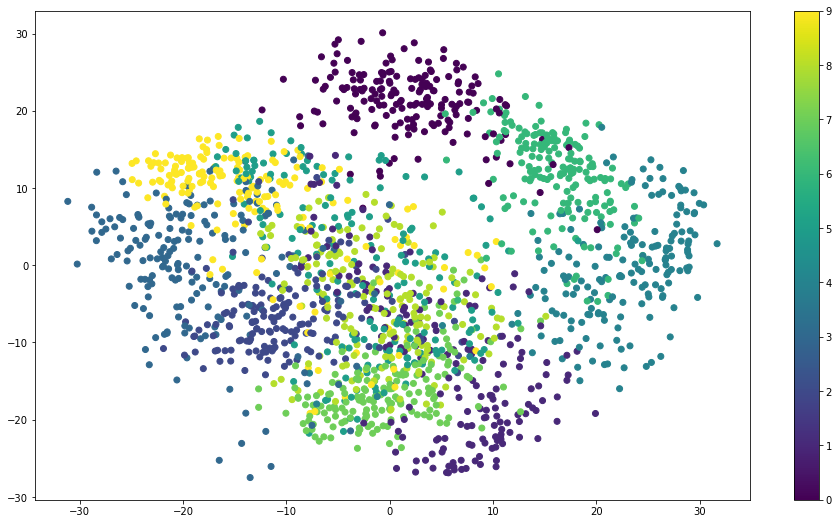

In [33]:
plt.figure(figsize=(16,9))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()
plt.show()

### 3.2 Compresión de datos
Ahora nuestro objetivo será encontrar qué número de dimensiones nos conserva al menos un 95% de los datos. Así que vamos a partir desde un modelo con el mismo número de dimensiones que el dataset de partida, es decir, `n_components=64`

In [34]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

Ahora que ya tenemos el modelo creado y entrenado podemos usar el atributo `explained_variance_ratio_` para entender como cambia la varianza de los datos en función del número de dimensiones, dentro del intervalo de dimensiones del modelo. Esto es, de 1 a 64.

In [48]:
variances = model.explained_variance_ratio_
variances

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Para entender mejor estos datos podemos realizar la suma acumulada de esta variación y para que podamos teminar de comprenderlo vamos a representarlo gráficamente.

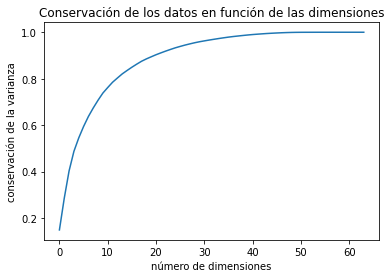

In [49]:
plt.plot(np.cumsum(variances))
plt.xlabel('número de dimensiones')
plt.ylabel('conservación de la varianza')
plt.title('Conservación de los datos en función de las dimensiones')
plt.show()

Viendo este gráfico ya podemos preguntarle a partir de dónde los datos se corservan en un 95%. Para ello necesitamos la función de Numpy `np.argmax`

In [103]:
# valores de la varianza que nos interesan
var = [0.9, 0.95, 0.99,0.999]
# diccionario varianza-dimensión
var_dim = {}                 

for i in var:
    var_dim[i] = np.argmax(np.cumsum(variances)>i)

print(var_dim)

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (<ipython-input-103-b0e2bec8b34e>, line 9)

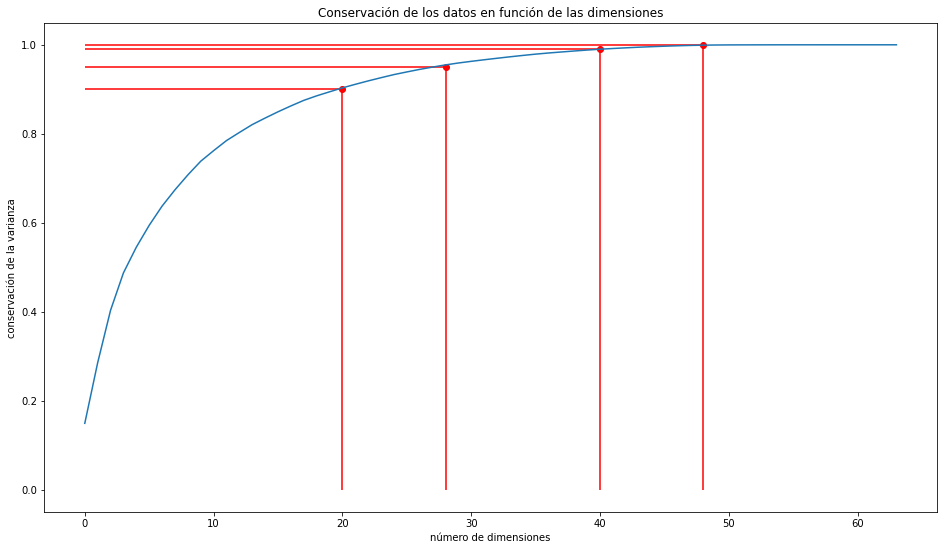

In [100]:
plt.figure(figsize=(16,9))
plt.plot(np.cumsum(model.explained_variance_ratio_))

# trazamos los puntos que nos interesa resltar
for i in var_dim:
    plt.scatter(var_dim[i], i, c='r')
    plt.hlines(i, 0, var_dim[i], colors='r')
    plt.vlines(var_dim[i], 0, i, colors='r')

plt.xlabel('número de dimensiones')
plt.ylabel('conservación de la varianza')
plt.title('Conservación de los datos en función de las dimensiones')
plt.show()

Veamos ahora cómo se aprecia la pérdida de información en base al caso de usar tan solo 20 dimensiones

In [104]:
model = PCA(n_components=20)
model.fit(X)

PCA(n_components=20)

Para hacer la comparación vamos a usar primero el transformador y después lo vamos a revertir usando `inverse_transform()`

In [106]:
# transformamos los datos
X_compress = model.fit_transform(X)
# los descomprimimos
X_decompress = model.inverse_transform(X_compress)

Ahora podemos representarlos gráficamente para comparar el resultado con el original

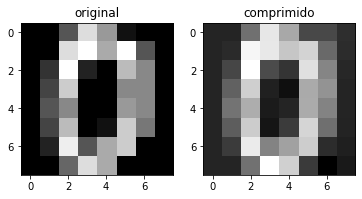

In [107]:
plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('comprimido')

plt.show()